<a href="https://colab.research.google.com/github/Souvik0651/hotel_booking_analysis/blob/main/Hotel_Booking_Analysis_Souvik_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

 **Importing Pandas Numpy matplotlib and seabornin the notebook**

In [ ]:
#import numpy and pandas library
import numpy as np      
import pandas as pd    

In [ ]:
#import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

 **Loading the Hotel Bookings.csv kept in the Drive**

In [ ]:
#mounting the csv file in colab notebook
from google.colab import drive    
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the csv file from drive
hotel_booking_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project -1/Hotel Bookings.csv')

Data exploration is the first step of data analysis used to explore and visualize data to uncover insights from the start or identify areas or patterns to dig into more

In [ ]:
# viewing the top five row of the file 
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# finding the shape of the dataframe
hotel_booking_df.shape

(119390, 32)

In [ ]:
# total information of dataframe
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Data reprocessing means data cleaning data trasformation and data reduction which will enhance the performance and understanding of a dataframe

**Making a copy of a original dataframe so that we work on the copy dataframe and the original data frame doesnot get affected**

In [ ]:
# making a copy of original dataframe 
hotel_booking_new= hotel_booking_df.copy()

**Data cleaning for better understanding of DataFrame**

In [ ]:
# finding the null values
hotel_booking_new.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
'''we can see that children has only four null values so we are replacing the null values with 0'''
# replacing NaN value for children column
hotel_booking_new['children']=hotel_booking_new['children'].fillna(0)

In [ ]:
'''after replacing children null values with 0 again checking how many columns has null value to fix them'''
# finding the total NaN values
hotel_booking_new.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
'''we are adding two columns children and babies to get their total numbers in one column name as kids'''
#  adding children and babies in one column
hotel_booking_new['Kids']=(hotel_booking_new['children']+hotel_booking_new['babies']).astype(int)

In [ ]:
'''we can see that agents and comapnies has many null values so it is better to drop the columns'''
''' we will also drop the column babies and children as we have added and made a new column as kids'''
# droping the columns 
hotel_booking_new.drop(['babies','children','company','agent'],axis=1,inplace=True)

In [ ]:
''' we can see country column has some null value so its better to droping the rows in which there are NaN values '''
# droping the columns
country_Nan=hotel_booking_new[hotel_booking_new['country'].isna()]
hotel_booking_new.drop(country_Nan.index,inplace=True)

In [ ]:
'''checking the information of the dataframe after cleaning if there are any null values are left or not and also the types of the columns'''
# information for dataframe
hotel_booking_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  meal                            118902 non-null  object 
 11  country                         118902 non-null  object 
 12  market_segment  

**Dropping of rows in which no guests have arrived in the hotels**

In [ ]:
'''finding the hotels in which no guest have arrived'''
no_guests=hotel_booking_new[(hotel_booking_new['adults']+hotel_booking_new['Kids'])==0]

In [ ]:
# dropping row with zero quests
hotel_booking_new= hotel_booking_new.drop(no_guests.index)

In [ ]:
# new shape of the dataframe
hotel_booking_new.shape

(118732, 29)

Analysing and visulisation of the data with number of questions 

 Q1.***What is the booking percentage between Resort Hotel and City Hotel?**

In [ ]:
# finding the number of hotels and its types
num_of_hotel=hotel_booking_new['hotel'].value_counts()
print(num_of_hotel)
print()
total_hotels=num_of_hotel.sum()
print(f'total number of hotels is {total_hotels}')

City Hotel      79147
Resort Hotel    39585
Name: hotel, dtype: int64

total number of hotels is 118732


***we can see that total number of hotels booked are 118732 in which number of city hotel are 79147 and resort hotel are 39585***

**Plotting a pie chart for booking percentage of type of hotels**

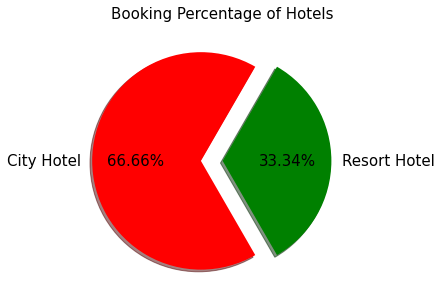

In [ ]:
# plotting pie chart
num_of_hotel.plot.pie(fontsize=15,autopct='%1.2f%%',figsize=(8,5),colors=['r','g'],ylabel='',explode=[0.2,0],shadow=True,startangle = 60)
plt.title('Booking Percentage of Hotels',fontsize=15)
plt.show()

***We can see 2/3 guests prefer city hotels over resorts***

**Q2. Finding the Yearly bookings for each year given in the dataframe**

In [ ]:
# Total count of arrival date year
hotel_booking_new['arrival_date_year'].value_counts() 

2016    56357
2017    40541
2015    21834
Name: arrival_date_year, dtype: int64

***Total guests arrived in hotels are 2015 is 21834, 2016 is 56357 and in 2017 is 40541.***

In [ ]:
# finding the total number of bookings in each years for city and resort hotels
tot_num_book= hotel_booking_new.groupby(['hotel'])['arrival_date_year'].value_counts()
tot_num_book

hotel         arrival_date_year
City Hotel    2016                 38058
              2017                 27446
              2015                 13643
Resort Hotel  2016                 18299
              2017                 13095
              2015                  8191
Name: arrival_date_year, dtype: int64

***Total number of booking in City hotel in year 2015 is 13643, 2016 is 38058 and 2017  is 27446.
Total number of booking in Resort hotel in year 2015 is 8191, 2016 is 18299 and 2017 is 13095***

Text(0.5, 1.0, 'Yearly bookings')

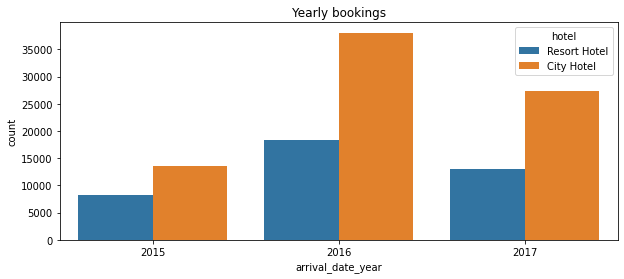

In [ ]:
# ploting a bargraph for yearly bookings of city and resort hotels
plt.rcParams['figure.figsize']=(10,4)
sns.countplot(x='arrival_date_year',data=hotel_booking_new,hue='hotel').set_title('Yearly bookings')


***It could be seen from the visual aid that the trend from 2015 to 2016 is increasing.
While the average rate of inflation in the number of guests opting for resorts increased by 63%, the number of guests in city hotels esclated to 266% of the previous year.
2017, on the other hand showed a downward tajectory in the daily footfall in both kinds of hotel, showing are decline of 29% on an average.***


**Q3. Bookings that were not cancelled.**

In [ ]:
# yearly bookings of hotels which were not cancelled
not_canceled=hotel_booking_new[hotel_booking_new['is_canceled']==0]
r=hotel_booking_new[hotel_booking_new['is_canceled']==0]

In [ ]:
# number of arrivals for city hotels and resort hotels in 2015,2016 and 2017
r.groupby(['arrival_date_year'])['hotel'].value_counts()

arrival_date_year  hotel       
2015               City Hotel       7654
                   Resort Hotel     6071
2016               City Hotel      22662
                   Resort Hotel    13389
2017               City Hotel      15766
                   Resort Hotel     9048
Name: hotel, dtype: int64

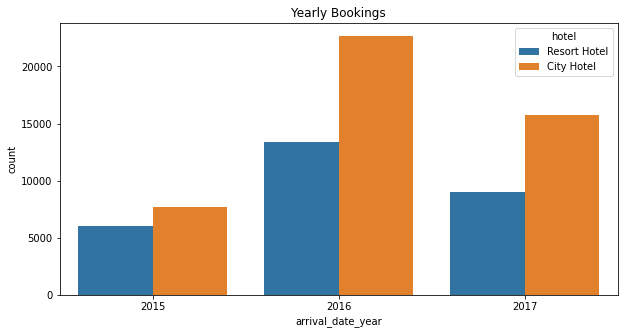

In [ ]:
# graphical representation for  yearly non canceletion hotels
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x='arrival_date_year',data=not_canceled,hue='hotel').set_title('Yearly Bookings')
plt.show()

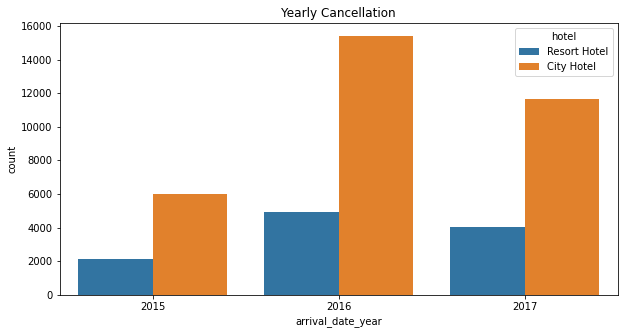

In [ ]:
# graphical representation for  yearly cancelled hotels
canceled=hotel_booking_new[hotel_booking_new['is_canceled']!=0]
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x='arrival_date_year',data=canceled,hue='hotel').set_title('Yearly Cancellation')
plt.show()

In 2015, The city hotels' section saw an average non cancellation rate of 0.56, while resorts had the rate around resort 0.76 
The same for 2016 would be 0.61 and 0.72 for city hotels' and resorts' respectively.
As for 2017, the non cancellation rates were 0.57 and 0.70 for city hotels' and resorts' respectively.
It has been observed that guests are more likely to not cancel on bookings with a resort.***

In [ ]:
hotel_booking_new['is_canceled'].unique()

array([0, 1])

In [ ]:
hotel_booking_new['is_canceled'].replace({0:'No',1:'Yes'},inplace= True)

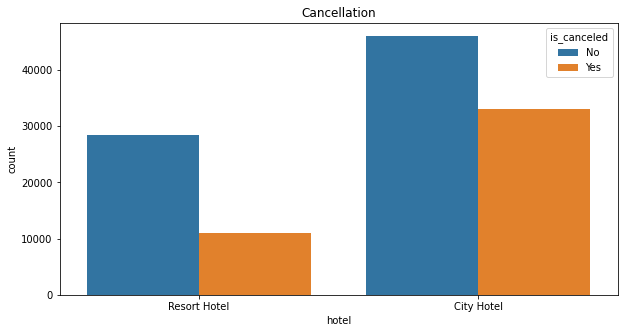

In [ ]:
sns.countplot(hue ="is_canceled",data= hotel_booking_new, x='hotel').set_title('Cancellation')
plt.show()

***In this graph we can see that number of cancellation and number of non cacellation is much more in City Hotel as compared to Resort Hotel***

Q3.***Monthly footfall in different types of hotels?***

In [ ]:
hotel_booking_new.groupby(['hotel'])['arrival_date_month'].value_counts()

hotel         arrival_date_month
City Hotel    August                8967
              May                   8221
              July                  8071
              June                  7885
              October               7580
              April                 7469
              September             7392
              March                 6434
              February              4950
              November              4334
              December              4114
              January               3730
Resort Hotel  August                4873
              July                  4540
              April                 3569
              May                   3547
              October               3502
              March                 3279
              September             3067
              February              3047
              June                  3032
              December              2596
              November              2397
              January   

Text(0.5, 1.0, 'Busiest month')

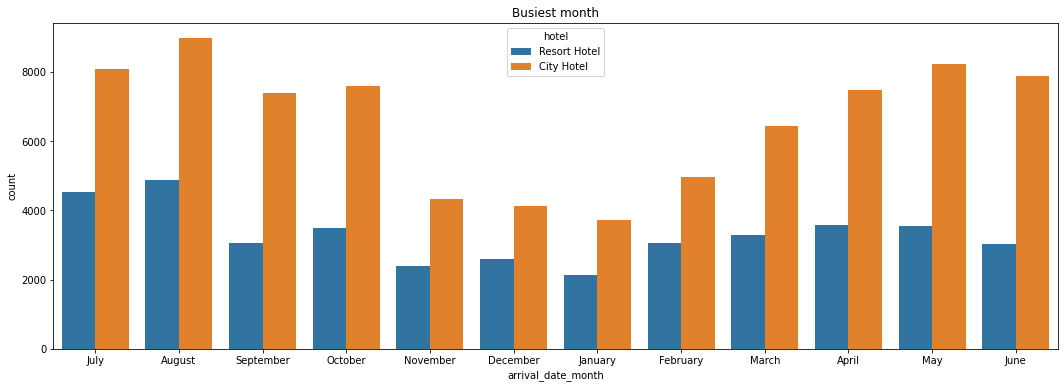

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='arrival_date_month', hue='hotel', data= hotel_booking_new).set_title('Busiest month')

***The trajectory of the graph is in the shape of a BELL CURVE. This suggest that the middle of the year are some of the busiest time, peaking at August, over the period of 3 years.***

***Q4.Nationality of the guests.***


In [ ]:
top10=hotel_booking_new['country'].value_counts().head(10).index.tolist()
top10

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

In [ ]:
top_10=hotel_booking_new[hotel_booking_new['country'].isin(top10)]

Text(0.5, 1.0, ' Top countries with maximum hotel bookings')

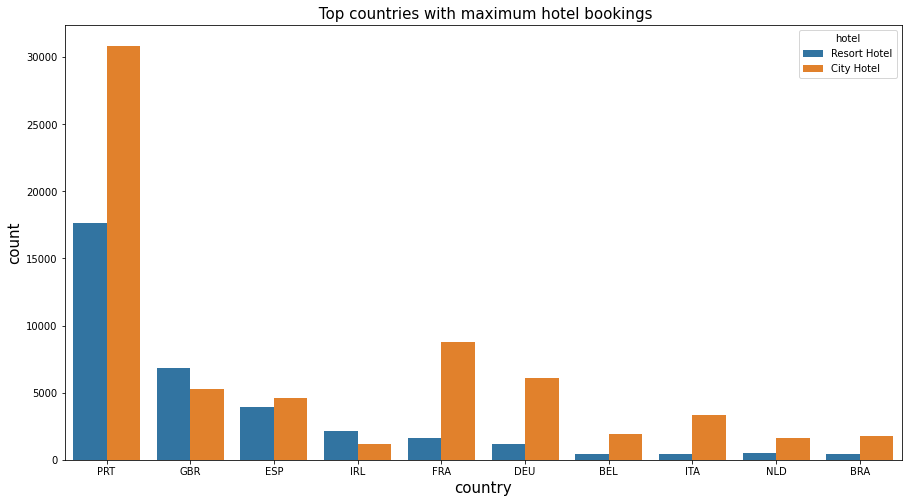

In [ ]:
plt.rcParams['figure.figsize']=(15,8)
plt.xlabel('country',fontsize=15)
plt.ylabel('counts',fontsize=15)
sns.countplot(x='country',hue='hotel',data=top_10).set_title(' Top countries with maximum hotel bookings',fontsize=15)

***The visual aid suggests that Portuguese are the most popular guests at both the type of hotels. Other prominent nationalities are British, Espanol, Irish, French, etc., in the same order.
Aside from visitors from The Great Britain and Ireland, guests mostly prefer to stay at city hotels.***

***Q.5 Maximum number of nights guest stays in the hotel?***


In [ ]:
hotel_booking_new['stays_in_weekend_nights'].agg('max')

16

In [ ]:
hotel_booking_new['stays_in_week_nights'].agg('max')

40

Q.6 ADR V/s Arrival Month.

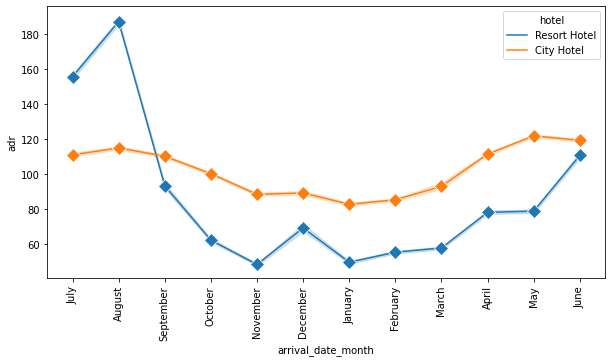

In [ ]:
plt.rcParams['figure.figsize']= (10,5)
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=hotel_booking_new,marker='D',markersize=10)
plt.xticks(rotation='90')
plt.show()

***It has been observed that the average cost of staying for a guest in city hotels remains somewhat constant, fluctuating within a range of 100 to 120.
Whereas in the case of Resorts, there is a spiked in the month of August. The global minima for the same is observed from January to March and then from October to November. The local maxima at December suggests an influx of guests for the occassion of The New Year.***

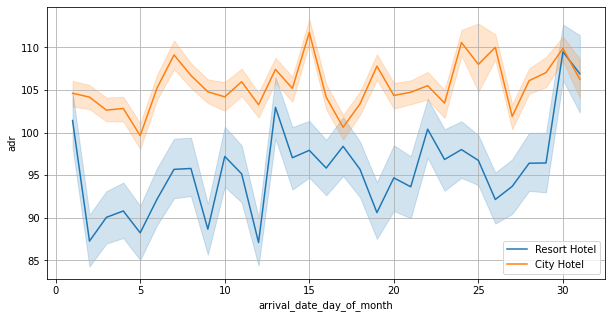

In [ ]:
sns.lineplot(x='arrival_date_day_of_month',y='adr',hue='hotel',data=hotel_booking_new)
plt.legend(loc="lower right")
plt.grid()

***On a cursory glance, we can observe that City hotels have higher ADR compare to Resorts.
We can see that the end of month is the busiest time thusly leading to higher ADR in both the type of hotels.
It would be justified from the graph that begining of the month (starting from day 2 to day 9) are the quitest time leading to lower ADR.***

Q.9 ***Which was the most booked accommodation type (Single, Couple, Family)?***

In [ ]:
hotel_booking_new['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55, 20,  6,  5, 10,  0])

In [ ]:
booked_1=hotel_booking_new[hotel_booking_new['adults']==1]
booked_2=hotel_booking_new[hotel_booking_new['adults']==2]
booked_3=hotel_booking_new[hotel_booking_new['adults']>2]

In [ ]:
booked_3.head(2)
b3=booked_3.copy()
b3['fam']=b3['adults']+b3['Kids']

In [ ]:
b2=b3[['fam','hotel']]
fd=b2.groupby(['hotel'])['fam'].count()
fd=fd.rename('family')

In [ ]:
sing1=booked_1[['adults','hotel']]
p=sing1.groupby(['hotel'])['adults'].value_counts()
p=p.droplevel(level=1)
p=p.rename('single')

In [ ]:
ring=booked_2[['adults','hotel']]
ri=ring.groupby(['hotel'])['adults'].value_counts()
ri=ri.droplevel(level=1)
ri=ri.rename('couple')

In [ ]:
df=pd.concat([p,ri,fd],axis=1)
df

,single,couple,family
hotel,,,
City Hotel,15878,58240,4806
Resort Hotel,6857,31258,1470


In [ ]:
df=df.transpose()
df

hotel,City Hotel,Resort Hotel
single,15878,6857
couple,58240,31258
family,4806,1470


In [ ]:
df.shape

(3, 2)

In [ ]:
x_axis=np.arange(len(df))
x_axis

array([0, 1, 2])

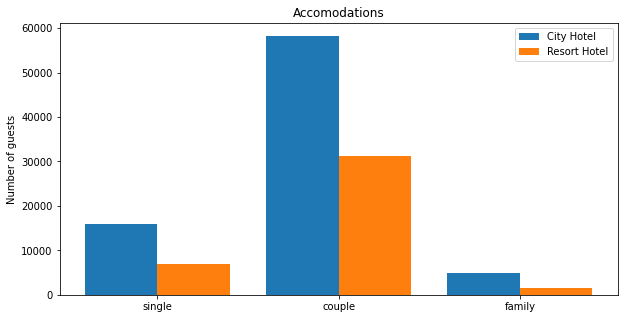

In [ ]:
plt.bar(x_axis - 0.2, df['City Hotel'], 0.4, label = 'City Hotel')
plt.bar(x_axis + 0.2, df['Resort Hotel'], 0.4, label = 'Resort Hotel')
  
plt.xticks(x_axis,df.index.tolist())
plt.ylabel("Number of guests")
plt.title("Accomodations")
plt.legend()
plt.show()

***Graph represents that the maximum booking of hotels are done by couple and lowest booking are done by family?***

In [ ]:
single_x=p.index.tolist()
single_x=np.array(single_x)

In [ ]:
single_y=p.tolist()

In [ ]:
couple_y=ri.tolist()

In [ ]:
fam_y=fd.tolist()

Text(0, 0.5, 'no of quests')

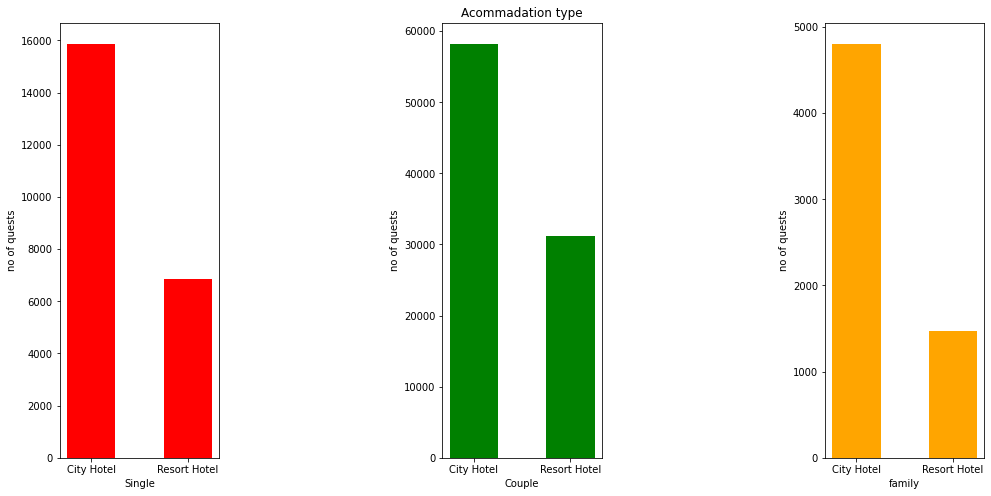

In [ ]:
plt.rcParams['figure.figsize']=(20,8)
plt.subplot(1,6,1)

plt.bar(single_x,single_y,width=0.5,align='center',color='r')
plt.xlabel('Single')
plt.ylabel('no of quests')
plt.subplot(1,6,3)
plt.title("Acommadation type")
plt.bar(single_x,couple_y,width=0.5,align='center',color='g')
plt.xlabel('Couple')
plt.ylabel('no of quests')
plt.subplot(1,6,5)
plt.bar(single_x,fam_y,width=0.5,align='center',color='orange')
plt.xlabel('family')
plt.ylabel('no of quests')

***While family type bookings were the least popular kind, the graph suggests that couples formed the largest topography of guests ranging to 75.5% of the total customer lists.***

In [ ]:
hotel_booking_new['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

Q9. Source of bookings.

In [ ]:
market_segment=hotel_booking_new['market_segment'].value_counts()
w=market_segment.index.tolist()

In [ ]:
v=hotel_booking_new['market_segment'].value_counts().tolist()
sum=0
for i in v:
  sum=sum+i
sum

118732

In [ ]:
tot=[str(round(i*100/sum,1))+"%" for i in v]
# for i in v:
#   tot.append(str(round(i*100/sum,1))+"%")
tot

['47.4%', '20.3%', '16.7%', '10.5%', '4.3%', '0.6%', '0.2%', '0.0%']

In [ ]:
q=list(zip(w,tot))
q

[('Online TA', '47.4%'),
 ('Offline TA/TO', '20.3%'),
 ('Groups', '16.7%'),
 ('Direct', '10.5%'),
 ('Corporate', '4.3%'),
 ('Complementary', '0.6%'),
 ('Aviation', '0.2%'),
 ('Undefined', '0.0%')]

In [ ]:
l=[str(i).replace(",","=") for i in q ]
# for i in q:
#   n = str(i).replace(",","=")
#   l.append(n)
l

["('Online TA'= '47.4%')",
 "('Offline TA/TO'= '20.3%')",
 "('Groups'= '16.7%')",
 "('Direct'= '10.5%')",
 "('Corporate'= '4.3%')",
 "('Complementary'= '0.6%')",
 "('Aviation'= '0.2%')",
 "('Undefined'= '0.0%')"]

In [ ]:
t=[str(i) for i in l ]
# for i in q:
#   m = list(i)
#   t.append(m)
t

["('Online TA'= '47.4%')",
 "('Offline TA/TO'= '20.3%')",
 "('Groups'= '16.7%')",
 "('Direct'= '10.5%')",
 "('Corporate'= '4.3%')",
 "('Complementary'= '0.6%')",
 "('Aviation'= '0.2%')",
 "('Undefined'= '0.0%')"]

In [ ]:

g=[]
for i in t:
  j= i.replace("('","")
  j=j.replace("')","")
  j=j.replace("'","")
  g.append(j)
g

['Online TA= 47.4%',
 'Offline TA/TO= 20.3%',
 'Groups= 16.7%',
 'Direct= 10.5%',
 'Corporate= 4.3%',
 'Complementary= 0.6%',
 'Aviation= 0.2%',
 'Undefined= 0.0%']

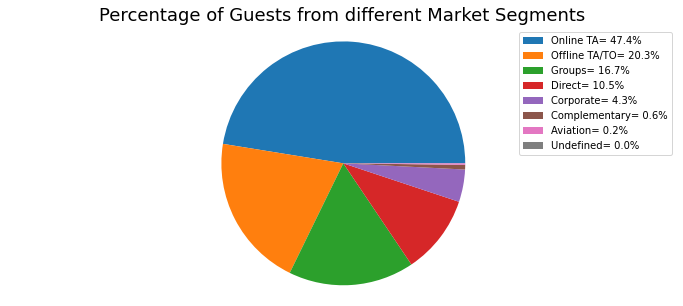

In [ ]:

plt.rcParams['figure.figsize']=(12,5)
plt.rcParams['font.size']=15
patches=plt.pie(market_segment)
plt.title('Percentage of Guests from different Market Segments')
plt.legend(labels=g,loc='upper right',prop={'size':10})
plt.axis('equal')
plt.show()

***The maximum number of bookings were done through Online Agents (at 47.4%). Another prominent source of booking was done through Offline methods (at 20.3%).
Other methods of booking include Groups, Direct, Corporate, etc., forming the remaining 32.3%***

Q10.***What is the relationship between lead time and cancellation?***


In [ ]:
x=hotel_booking_new['hotel'].value_counts().sum()

In [ ]:
rel_lead_canc=hotel_booking_new.groupby(['lead_time','is_canceled'])['hotel'].size().unstack().reset_index()
rel_lead_canc.head(2)

is_canceled,lead_time,No,Yes
0,0,5739.0,413.0
1,1,3064.0,316.0


In [ ]:
plt.rcParams['figure.figsize']=(15,8)
lead_time=rel_lead_canc.loc[:,['lead_time']]
lt=lead_time.lead_time.to_list()[0:151]

In [ ]:
No=rel_lead_canc.No.fillna(0)[0:151]
Yes=rel_lead_canc.Yes.fillna(0)[0:151]

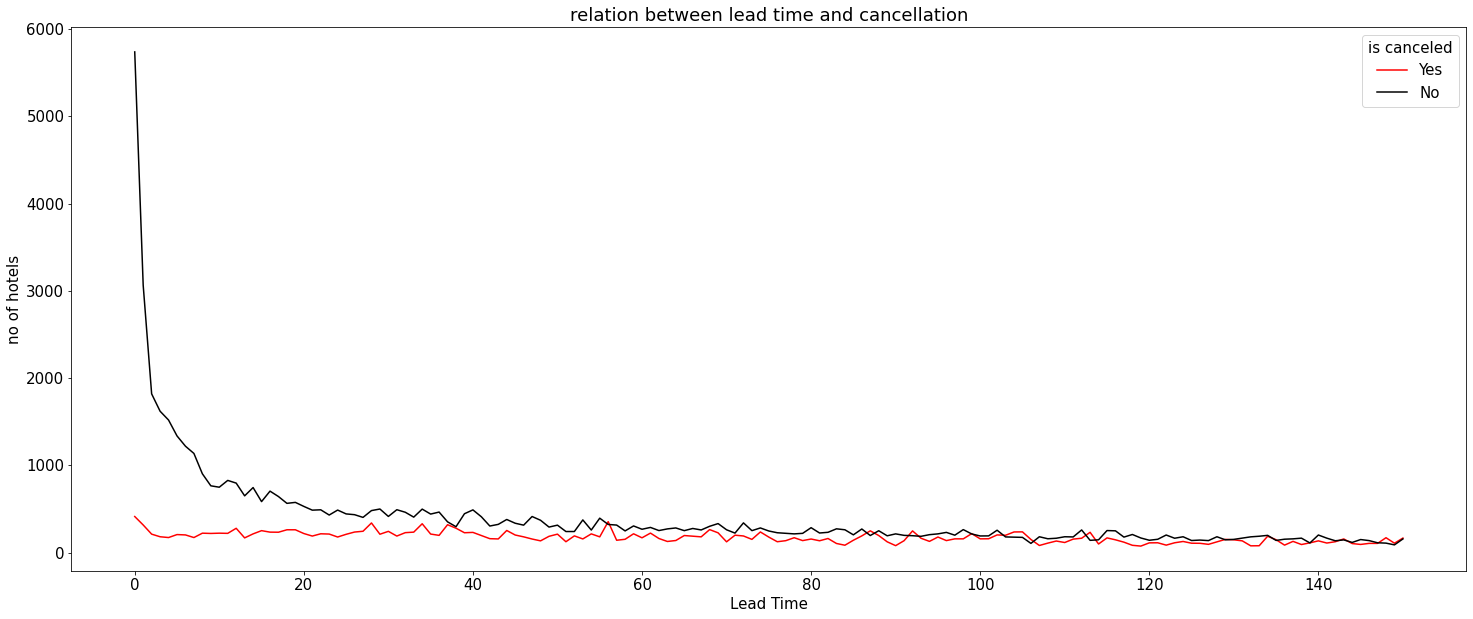

In [ ]:
plt.rcParams['figure.figsize']=(25,10)
plt.plot(lt,Yes,color='r')
plt.plot(lt,No,color='k')
plt.xlabel('Lead Time')
plt.ylabel('no of hotels')
plt.legend(title='is canceled',labels=['Yes','No'])
plt.title('relation between lead time and cancellation')
plt.show()

***On a cursory glance it is visible that, majority of the guests book their prefer rooms as late as possible within a margin of 20 days 
It has also been obseved that guests are likely to cancel more when they book their rooms of with a span of 80 days or more as their lead time(almost 50%)***

Q.12.***Market segment has any impact on repeated customer?***

In [ ]:
hotel_booking_new['is_repeated_guest'].replace({0:'No',1:'Yes'},inplace=True)

In [ ]:
repeated_guest=hotel_booking_new[hotel_booking_new['is_repeated_guest']=='Yes']
# not_repeated_quest=hotel_booking_new[hotel_booking_new['is_repeated_guest']=='No']
repeated_guests=repeated_guest.groupby(['market_segment'])['hotel'].count()

In [ ]:
15/38


0.39473684210526316

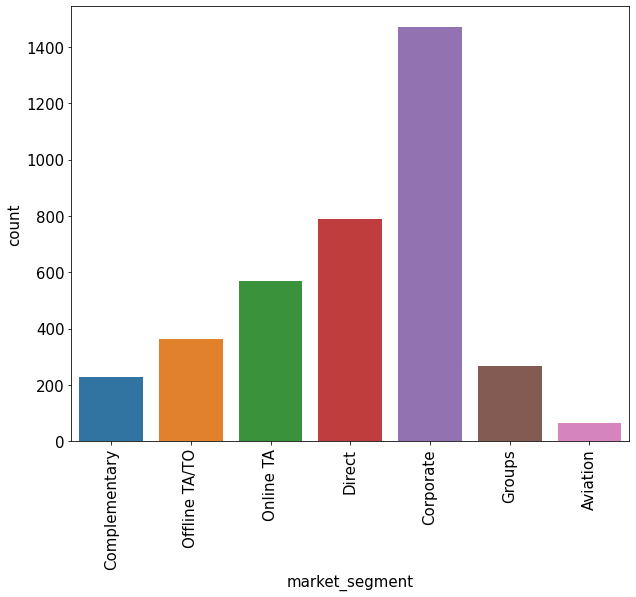

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
plt.xticks(rotation=90)
sns.countplot(x='market_segment',data=repeated_guest)
plt.show()

***Corporates are the largest customer base for hotels amounting for almost 40% of the market share, with the follower ups being Direct bookings, Online Travel agencies,etc.*** 

Q.13. Required car parking spaces.

In [ ]:
hotel_booking_new['required_car_parking_spaces'].value_counts()


0    111429
1      7270
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [ ]:
x_car=hotel_booking_new['required_car_parking_spaces'].value_counts().index.tolist()
y_car=hotel_booking_new['required_car_parking_spaces'].value_counts().tolist()

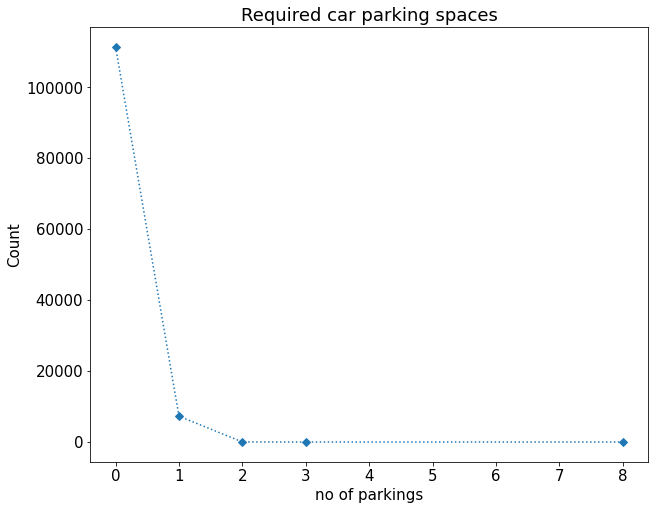

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
plt.plot(x_car,y_car,marker='D',ls='dotted')
plt.ylabel('Count')
plt.xlabel("no of parkings")
plt.title('Required car parking spaces')
plt.show()

***We can see that maximum customers doesnot requires Parking spaces.***

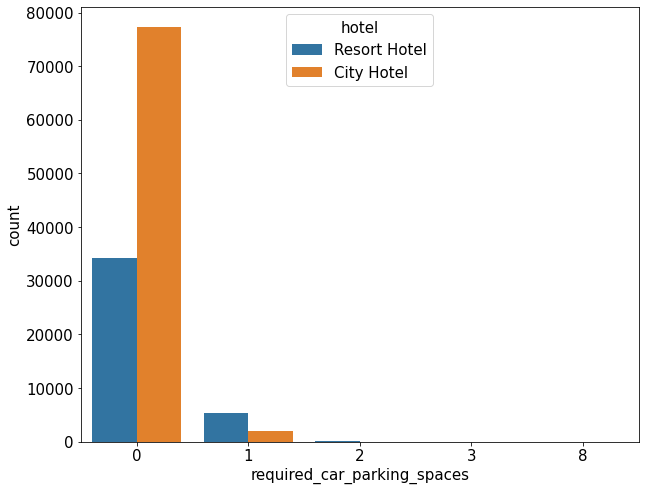

In [ ]:
sns.countplot(x='required_car_parking_spaces',hue='hotel',data= hotel_booking_new)

***In both Resort and city hotels we observe maximum customers donot require parking spaces, suggesting that majority of guests are travellers staying for a short visit.***

Q14.***How long people stay in a hotel?***

In [ ]:
hotel_booking_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Kids'],
      dtype='object')

In [ ]:
hotel_booking_new['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
check_out=hotel_booking_new[hotel_booking_new['reservation_status']=='Check-Out']
check_out=check_out[['reservation_status_date','arrival_date_day_of_month','arrival_date_month','arrival_date_year']]
check_out.head()

,reservation_status_date,arrival_date_day_of_month,arrival_date_month,arrival_date_year
0,2015-07-01,1,July,2015
1,2015-07-01,1,July,2015
2,2015-07-02,1,July,2015
3,2015-07-02,1,July,2015
4,2015-07-03,1,July,2015


In [ ]:
from datetime import datetime
check_out['reservation_status_date']=pd.to_datetime(check_out['reservation_status_date'], format='%Y-%m-%d')
check_out['reservation_status_date']
check_in=check_out.iloc[:,1:]
day=check_in['arrival_date_day_of_month'].tolist()
month=check_in['arrival_date_month'].tolist()
year=check_in['arrival_date_year'].tolist()


In [ ]:
check_in_date=list(zip(day,month,year))
check_in_date=np.array(check_in_date)
check_in_date

array([['1', 'July', '2015'],
       ['1', 'July', '2015'],
       ['1', 'July', '2015'],
       ...,
       ['31', 'August', '2017'],
       ['31', 'August', '2017'],
       ['29', 'August', '2017']], dtype='<U21')

In [ ]:
check_date=[]
for i in check_in_date:
  v=i[2]+'-'+i[1][:3]+'-'+i[0]
  check_date.append(datetime.strptime(v,'%Y-%b-%d'))


In [ ]:
check_out['arrival_date']=check_date

In [ ]:
check_out.head()

,reservation_status_date,arrival_date_day_of_month,arrival_date_month,arrival_date_year,arrival_date
0,2015-07-01,1,July,2015,2015-07-01
1,2015-07-01,1,July,2015,2015-07-01
2,2015-07-02,1,July,2015,2015-07-01
3,2015-07-02,1,July,2015,2015-07-01
4,2015-07-03,1,July,2015,2015-07-01


In [ ]:
check_in_out=check_out.drop(check_out.iloc[:,1:4],axis=1)
check_in_out=check_in_out.assign(Total_stay= lambda x:(x['reservation_status_date']-x['arrival_date']))
check_in_out['adr']=hotel_booking_new['adr']
check_in_out=check_in_out[check_in_out['adr']>1]

In [ ]:
# check_in_out['Total_stay'].unique()

In [ ]:
stay_list=check_in_out["Total_stay"].tolist()

In [ ]:
vv=[]
for i in str(stay_list).split(","):
  vv.append(int(i[12:14]))
set(vv)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 28,
 29,
 30,
 34,
 35,
 42,
 45,
 56}

In [ ]:
check_in_out['Total_stay1']=vv
c=check_in_out['Total_stay1']

In [ ]:
mean=check_in_out.groupby([c])['adr'].mean()

In [ ]:
ry=mean.tolist()

In [ ]:
tx=mean.index.tolist()

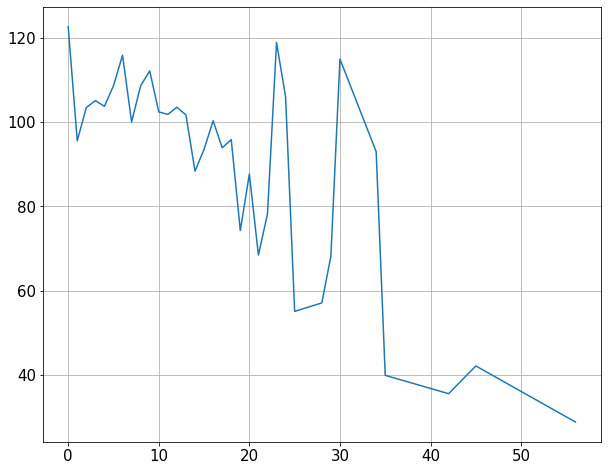

In [ ]:
plt.grid()
plt.plot(tx,ry)
plt.show()

We can observe from the graph that first 25 days average daily rate is very high after that average daily rate decrease sharply till 30 then we can see inclination and after that adr reduces

In [ ]:
x=hotel_booking_new['stays_in_week_nights']+hotel_booking_new['stays_in_weekend_nights']
y=hotel_booking_new.groupby([x])['adr'].mean()[0:31]
y

0       0.000000
1      95.230944
2      97.911907
3     105.255594
4     105.040611
5     113.423395
6     120.236710
7     103.526099
8     114.536560
9     114.661661
10    108.331061
11    108.697321
12    106.708909
13    112.207554
14     95.019780
15     96.162254
16     94.694750
17     95.355000
18     78.929429
19     99.495455
20     76.225000
21     77.982676
22     81.266154
23     60.762500
24     83.590000
25     58.608378
26     73.790000
27     79.700000
28     59.823529
29     95.523077
30     76.310769
Name: adr, dtype: float64

In [ ]:
r=y.tolist()
q=y.index

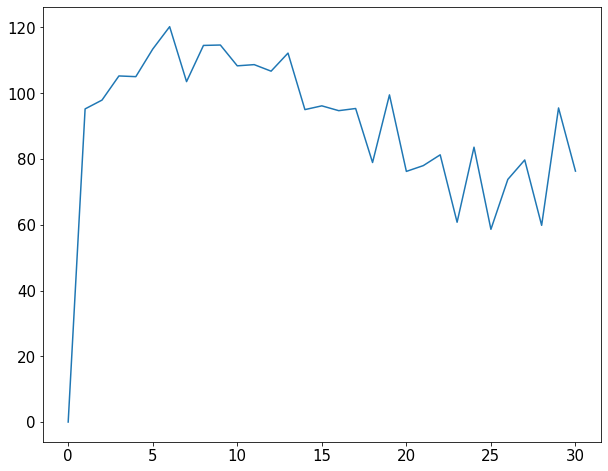

In [ ]:
plt.plot(q,r)

A large no of guests prefer to stay at a hotel for 5 to 15 days. Another local maxima can be observed at the 30 day interval suggeting a monthly stint.

Prefered meals types.

BB means bed and breakfast.
• HB means half board, in
which breakfast and dinner
are included.
• FB means full board, in which
breakfast, lunch and dinner
are included.
• SC means, self-catering (no
meals are included).

In [ ]:
hotel_booking_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Kids'],
      dtype='object')

In [ ]:
hotel_booking_new['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

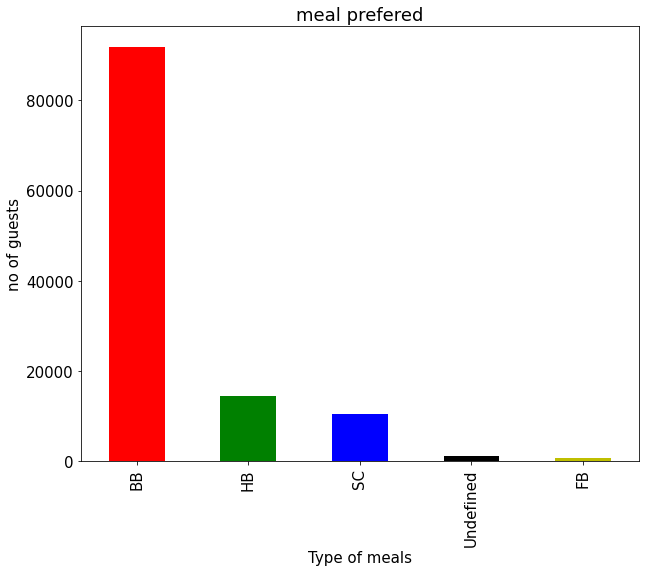

In [ ]:
u=hotel_booking_new['meal'].value_counts()
u.plot(kind='bar',xlabel='Type of meals',ylabel='no of guests',color=['red','g','b','k','y'],title='meal prefered')

***As majority of the guests are staying for a short stint of upto 10 days they prefer to have (breakfast only) type meal, hence opting for BB. This demography suggests that guest are intrested in visiting places , thusly not staying at the hotel for majority of time. Other popular option for fooding include HB, SC and FB.***